In [59]:
import sys 

import numpy as np

import pandas as pd

import scanpy as sc

import seaborn as sns

sys.path.extend(["../../..", "."])
from paths import DATA_DIR

In [10]:
adata_host = sc.read_h5ad(DATA_DIR / "processed" / "unperturbed_time_course_host.h5ad")

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


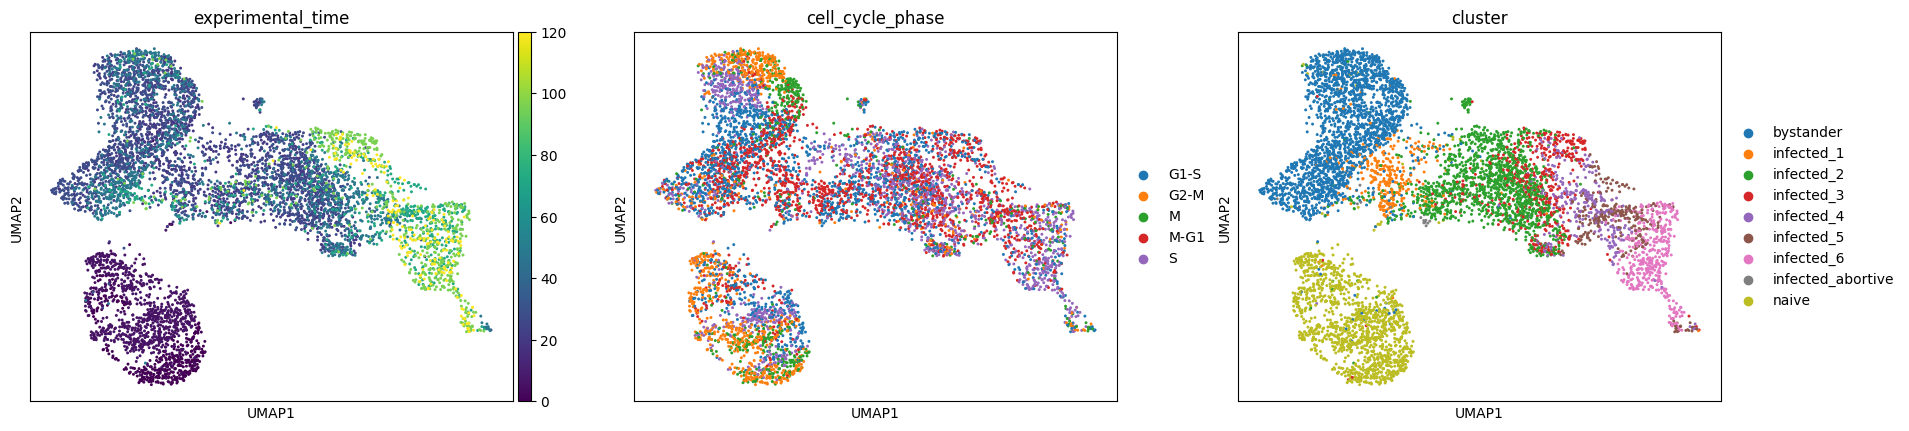

In [26]:
sc.pl.umap(adata_host, color=["experimental_time", "cell_cycle_phase", "cluster"])

In [6]:
adata_host

AnnData object with n_obs × n_vars = 6622 × 34023
    obs: 'cell_barcode', 'gem_group', 'UMI_count', 'guide_UMI_count', 'guide_read_count', 'guide_coverage', 'MOI', 'experimental_time', 'cell_cycle_phase', 'viral_load', 'interferon_score', 'cluster', 'UMAP_1', 'UMAP_2'
    var: 'ENSMBL', 'gene ID', 'mt', 'is_host', 'highly_variable'
    uns: 'MOI_colors', 'cell_cycle_phase_colors', 'cluster_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [40]:
ct_phase_cluster = pd.crosstab(adata_host.obs.cluster, adata_host.obs.cell_cycle_phase, normalize='index')

<Axes: xlabel='cell_cycle_phase', ylabel='cluster'>

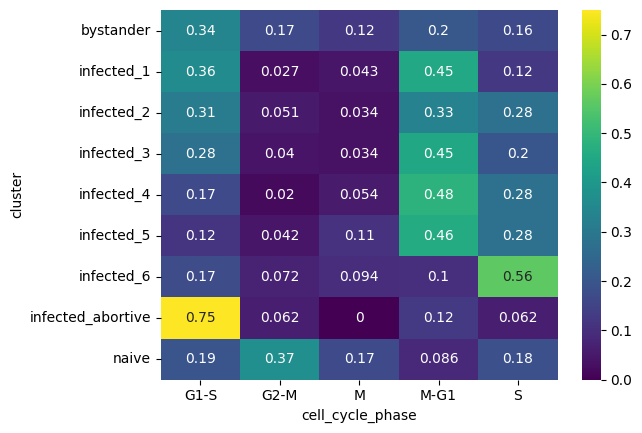

In [41]:
sns.heatmap(ct_phase_cluster, annot=True, cmap="viridis")

In [52]:
ct_time_cluster = pd.crosstab(adata_host.obs.cluster, adata_host.obs.experimental_time, normalize='columns')

<Axes: xlabel='experimental_time', ylabel='cluster'>

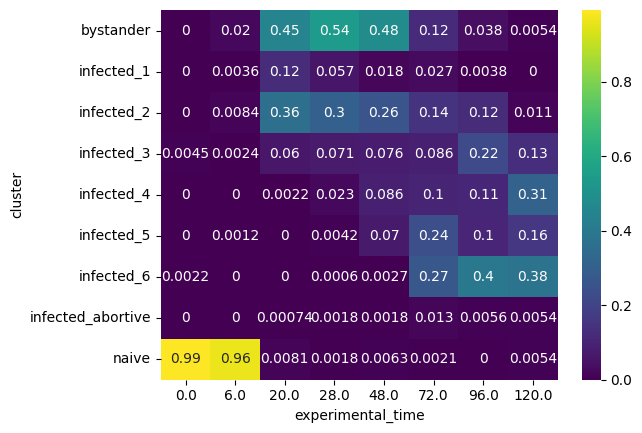

In [53]:
sns.heatmap(ct_time_cluster, annot=True, cmap="viridis", fmt='.2g')

In [38]:
bystander = adata_host.obs.loc[adata_host.obs.cluster=="bystander"]

In [39]:
pd.crosstab(bystander.cell_cycle_phase, bystander.experimental_time)

experimental_time,6.0,20.0,28.0,48.0,72.0,96.0,120.0
cell_cycle_phase,,,,,,,
G1-S,7,200,323,176,20,4,1
G2-M,2,70,144,127,13,5,0
M,2,92,102,59,0,4,0
M-G1,2,162,152,105,10,6,0
S,4,82,184,69,13,1,0


**Run pseudotime**

In [78]:
adata_host.uns['iroot'] = np.flatnonzero(adata_host.obs['experimental_time'] == 0.0)[0]

In [79]:
sc.tl.diffmap(adata_host)

In [85]:
sc.tl.dpt(adata_host, n_branchings=1, n_dcs=10)

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


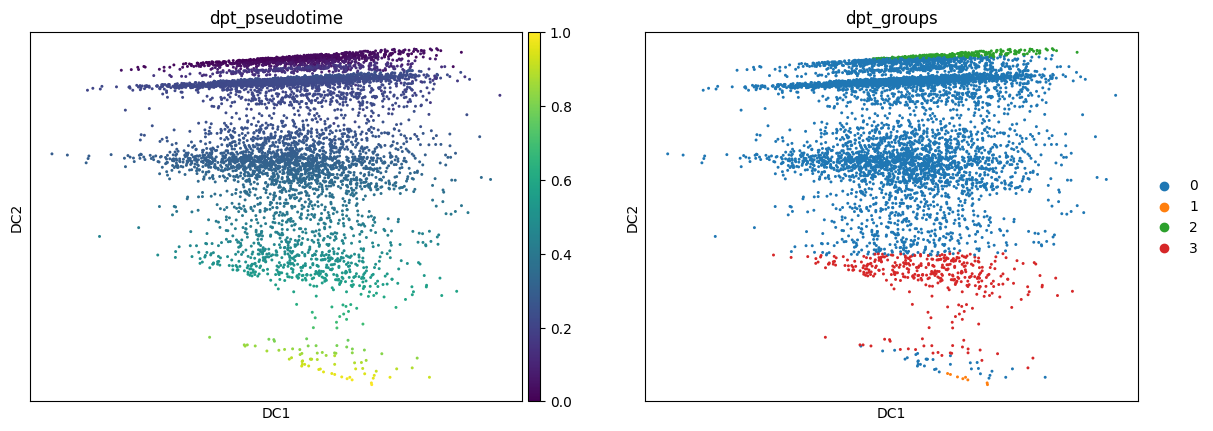

In [86]:
sc.pl.diffmap(adata_host, color=['dpt_pseudotime', 'dpt_groups'])

/nfs/homedirs/pala/miniconda3/envs/PerturbSeq_CMV/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


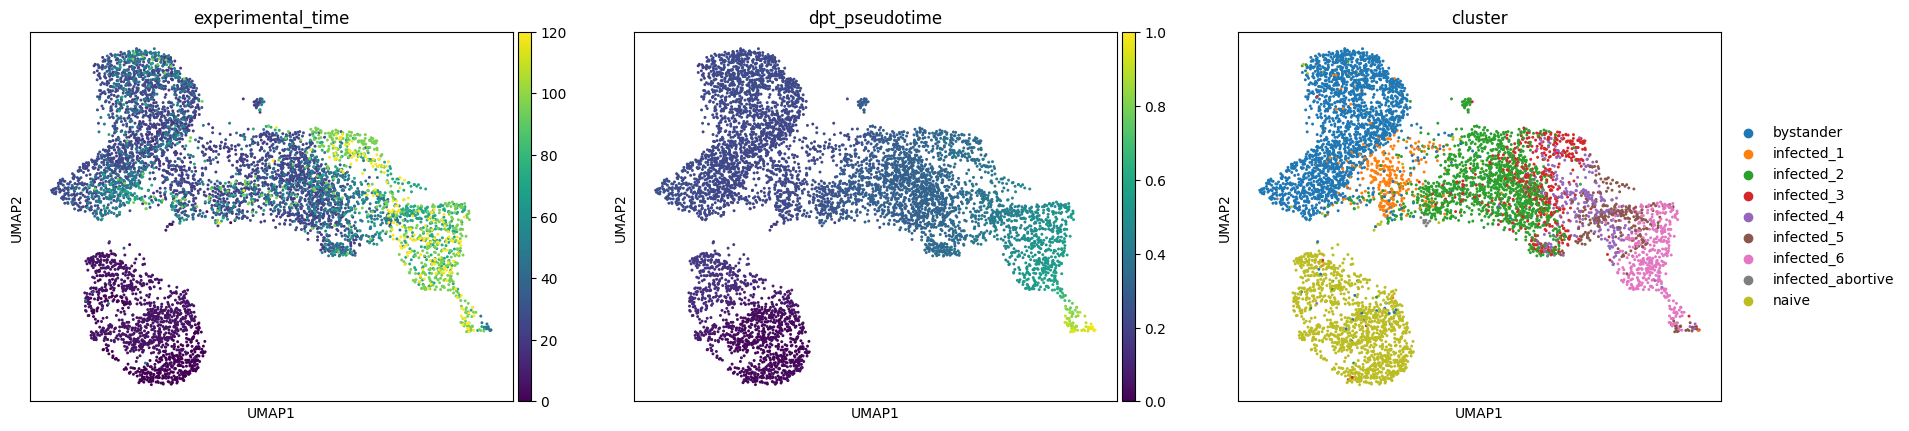

In [87]:
sc.pl.umap(adata_host, color=["experimental_time", "dpt_pseudotime", "cluster"])